___

**Execute these each time before program execution**

**Google colab doesn't save files so we have to upload audio and csv file each time we logged in.** 

___

pip install speaker-verification-toolkit                                
pip install numba==0.48                                                   
pip install resampy==0.3.1


In [ ]:
pip install resampy==0.3.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.1 MB 8.2 MB/s 
  Attempting uninstall: resampy
    Found existing installation: resampy 0.4.2
    Uninstalling resampy-0.4.2:
      Successfully uninstalled resampy-0.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.7 requires librosa>=0.7.2, but you have librosa 0.7.0 which is incompatible.


In [ ]:
from tkinter.ttk import Style
import speaker_verification_toolkit as svt
import librosa
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from glob import glob
import librosa.display
import IPython.display as ipd
from itertools import cycle
import seaborn as sns
sns.set_theme(style="white",palette=None)
color_pal=plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle=cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])


In [ ]:
audio_files=glob('../content/Audio.wav')
ipd.Audio(audio_files[0])

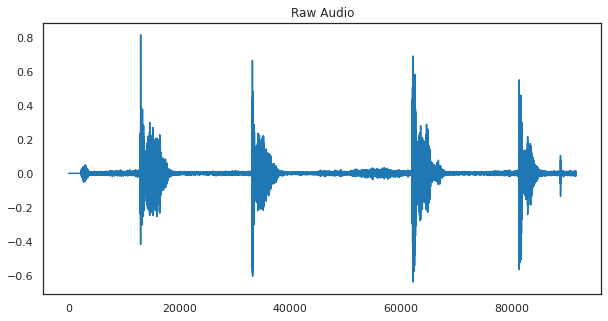

In [ ]:
y,h=librosa.load(audio_files[0])
pd.Series(y).plot(figsize=(10,5),title="Raw Audio")
plt.show()

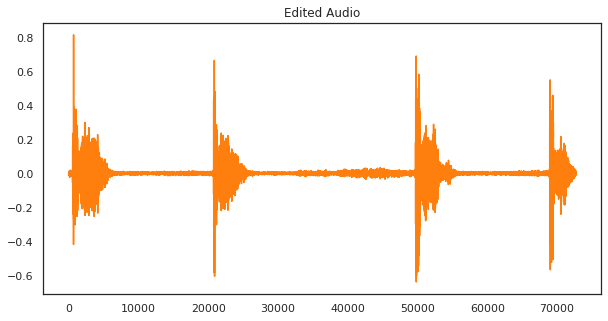

In [ ]:
yt, _=librosa.effects.trim(y,top_db=20)
pd.Series(yt).plot(figsize=(10,5),title="Edited Audio",color=color_pal[1])
plt.show()

AttributeError: ignored

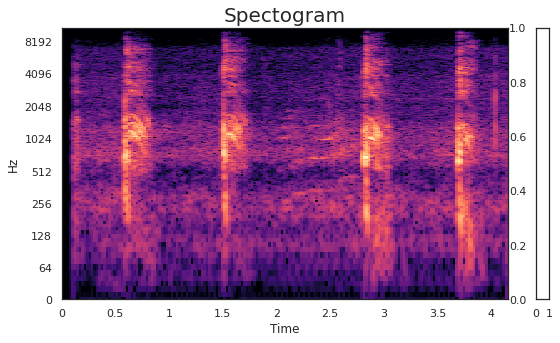

In [ ]:
D=librosa.stft(y)
S_db=librosa.amplitude_to_db(np.abs(D),ref=np.max)
fig,ax=plt.subplots(figsize=(10,5))
img=librosa.display.specshow(S_db,x_axis='time',y_axis='log',ax=ax)
ax.set_title('Spectogram',fontsize=20)
fig.colorbar(img,ax=ax)
plt.show()

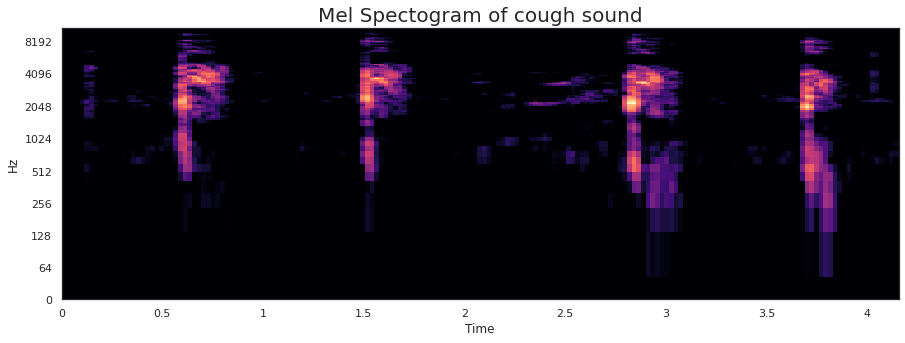

In [ ]:
S=librosa.feature.melspectrogram(y=y,sr=h,n_mels=120,)
S_db_mel =librosa.amplitude_to_db(np.abs(S),ref=np.max)
fig,ax=plt.subplots(figsize=(15,5))
img=librosa.display.specshow(S_db_mel,x_axis='time',y_axis='log',ax=ax)
ax.set_title('Mel Spectogram of cough sound',fontsize=20)
plt.show()

In [ ]:
import librosa
import speaker_verification_toolkit.tools as svt
data,sr = librosa.load('Audio.wav',sr=16000,mono='true')

data = svt.rms_silence_filter(data)

data = svt.extract_mfcc(data)

print("MFCC Values:\n",data[1])

MFCC Values:
 [ -4.56121541 -18.12328827 -24.58075376 -15.64119075 -24.94421153
  11.76798824  -9.32048633 -16.8554934   -5.00267287  20.38039545
 -15.49527464 -19.53507069 -19.25227524]


/usr/local/lib/python3.8/dist-packages/librosa/util/utils.py:726: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mag = np.abs(S).astype(np.float)
/usr/local/lib/python3.8/dist-packages/librosa/util/utils.py:726: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mag = np.abs(S).astype(np.float)
/usr/local/lib/python3.8/dist-packages/librosa/uti

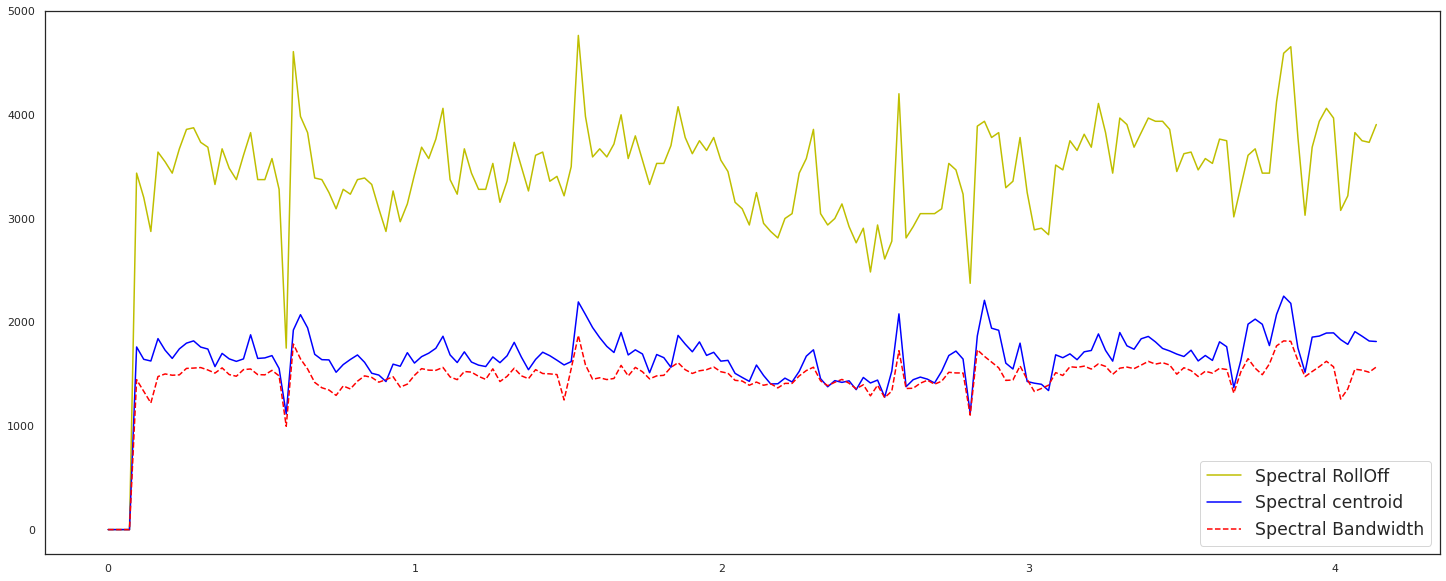

The values of spectral centroid, spectral bandwidth, spectral rolloff are given below:
Spectral Bandwidth : 1460.024082795726
Spectral Centroid  : 1640.512688845189
Spectral RollOff   : 3398.481145251397


In [ ]:
FRAME_SIZE = 1024
HOP_LENGTH = 512
sc_debussy = librosa.feature.spectral_centroid(y=y, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
ban_debussy = librosa.feature.spectral_bandwidth(y=y, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rolloff_debussy=librosa.feature.spectral_rolloff(y=y,sr=sr,n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
frames = range(len(sc_debussy))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)
len(t)
plt.figure(figsize=(25,10))
plt.plot(t, rolloff_debussy,'y')
plt.plot(t, sc_debussy, color='b')
plt.plot(t, ban_debussy,'--r')
plt.legend(["Spectral RollOff","Spectral centroid","Spectral Bandwidth"],loc="lower right",fontsize="x-large")
plt.show()


print("The values of spectral centroid, spectral bandwidth, spectral rolloff are given below:")
speccen=sum(ban_debussy)/len(ban_debussy)
specban=sum(sc_debussy)/len(sc_debussy)
specroll=sum(rolloff_debussy)/len(rolloff_debussy)
print("Spectral Bandwidth :",speccen)
print("Spectral Centroid  :",specban)
print("Spectral RollOff   :",specroll)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv('../content/FEFile.csv')
df.head()
df = df[['spectral_centroid', 'spectral_bandwidth', 'rolloff', 'mfcc1', 'mfcc2',
'mfcc3', 'mfcc5', 'mfcc6', 'mfcc8', 'mfcc12', 'mfcc14', 'mfcc21',
'mfcc30', 'mfcc32', 'mfcc34', 'mfcc36', 'label']]
df.head()
x = df.drop(['label'], axis=1)
y = df['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=100)

In [ ]:
dts = DecisionTreeClassifier()
dts.fit(x_train, y_train)
y_pred = dts.predict(x_test)
ac_dts = accuracy_score(y_pred, y_test)
ac_dts = ac_dts * 100
msg = "The accuracy obtained by Decision tree Clasiifier " + str(ac_dts) + str('%')
print(msg)
lee=list(range(3))
lee[0],lee[1],lee[2]=float(speccen),float(specban),float(specroll)
floats = [float(np_float) for np_float in data[1]]
lee=lee+floats


The accuracy obtained by Decision tree Clasiifier 85.9375%


In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
result = model.predict([lee])
print(result)
result = result[0]
if result == 'covid':
    msg = 'The Person Has the Covid Disease, Please Consult With A Doctor 😲'
    print(msg)
else:
    msg = 'You Don\'t Have Covid, Enjoy Your Day 😜'
    print(msg)

['covid']
The Person Has the Covid Disease, Please Consult With A Doctor 😲


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
